In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):  
    #The 5% of younger individuals who experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):  
    #The 95% of younger individuals who did not experience the side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #The 95% of older individuals who experienced the side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [10]:
train_samples

array([75, 25, 61, ..., 34, 53, 93])

In [11]:
train_labels

array([1, 0, 1, ..., 0, 1, 1])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
scaled_train_samples

array([[0.71264368],
       [0.13793103],
       [0.55172414],
       ...,
       [0.24137931],
       [0.45977011],
       [0.91954023]])

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [13]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 2s - loss: 0.6758 - accuracy: 0.5552 - 2s/epoch - 12ms/step
Epoch 2/30
210/210 - 1s - loss: 0.6448 - accuracy: 0.6248 - 534ms/epoch - 3ms/step
Epoch 3/30
210/210 - 1s - loss: 0.6071 - accuracy: 0.7214 - 533ms/epoch - 3ms/step
Epoch 4/30
210/210 - 1s - loss: 0.5614 - accuracy: 0.7933 - 533ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.5186 - accuracy: 0.8319 - 550ms/epoch - 3ms/step
Epoch 6/30
210/210 - 1s - loss: 0.4789 - accuracy: 0.8524 - 583ms/epoch - 3ms/step
Epoch 7/30
210/210 - 1s - loss: 0.4427 - accuracy: 0.8771 - 533ms/epoch - 3ms/step
Epoch 8/30
210/210 - 1s - loss: 0.4102 - accuracy: 0.8838 - 533ms/epoch - 3ms/step
Epoch 9/30
210/210 - 1s - loss: 0.3825 - accuracy: 0.9005 - 517ms/epoch - 2ms/step
Epoch 10/30
210/210 - 1s - loss: 0.3596 - accuracy: 0.9114 - 554ms/epoch - 3ms/step
Epoch 11/30
210/210 - 1s - loss: 0.3402 - accuracy: 0.9143 - 557ms/epoch - 3ms/step
Epoch 12/30
210/210 - 1s - loss: 0.3248 - accuracy: 0.9224 - 510ms/epoch - 2ms/step
Epo

In [17]:
test_labels = []
test_samples = []

In [18]:
for i in range(10):  
    #The 5% of younger individuals who experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    #The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):  
    #The 95% of younger individuals who did not experience the side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #The 95% of older individuals who experienced the side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [26]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [27]:
test_samples

array([ 71,  93,  19,  80,  64,  63,  63,  95,  54,  89,  35,  53,  82,
        85,  40,  81,  97,  76,  21,  90,  88,  29,  90,  85,  96,  21,
        89,  50,  45,  46,  57,  85,  43,  86,  85,  86,  37,  71,  15,
        96,  79,  48,  46,  18,  37,  37,  48,  94,  89,  14,  68,  55,
        69,  50,  51,  41,  15,  18,  31,  45,  88,  57,  92,  58,  74,
        73,  70,  92,  98,  74,  96,  72,  92,  94,  51,  47,  19,  66,
        16,  20,  97,  83,  66,  91,  15, 100,  95,  99,  31,  19,  82,
        66,  29,  51,  17,  72,  61,  16,  22,  74,  57,  80,  62,  15,
        20,  26,  51,  95,  29,  19,  46,  73,  81,  99,  43,  16,  93,
        89,  30,  84,  89,  71,  84,  89,  66,  95,  93,  76,  64,  47,
        99,  43,  72,  18,  66,  94,  29,  62,  74,  96,  85,  47,  69,
        28,  52,  26,  99,  88,  45,  17,  80,  84,  77,  70,  77,  41,
        40,  29,  90,  44,  18,  59,  84,  88,  69,  64,  73,  59,  85,
        85,  31,  94,  72,  28,  27,  82,  26,  50,  76,  89,  1

In [28]:
test_labels

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [35]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [37]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [39]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [40]:
rounded_predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [41]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [42]:
cm = confusion_matrix(y_true = test_labels, y_pred=rounded_predictions)

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[189  21]
 [ 10 200]]


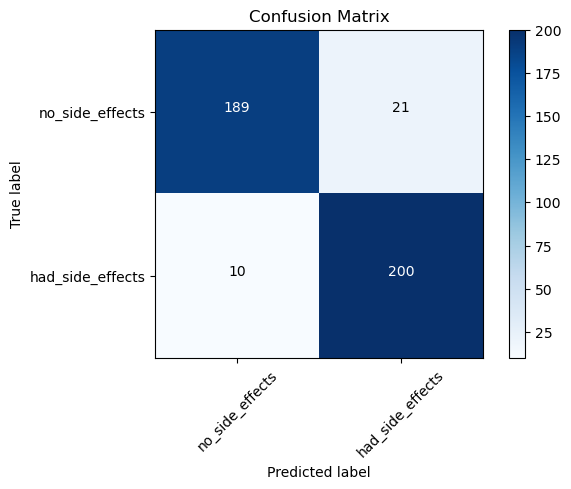

In [44]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')